# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [2]:
DataType = "MONK1"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData011 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.011)
AnalyzedData013 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.013)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
AnalyzedData017 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.017)
AnalyzedData019 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.019)
AnalyzedData021 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.021)
AnalyzedData023 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.023)
AnalyzedData025 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.025)
AnalyzedData027 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.027)
AnalyzedData029 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.029)
AnalyzedData031 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.031)
AnalyzedData033 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.033)
AnalyzedData035 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.035)
AnalyzedData037 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.037)
AnalyzedData039 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.039)

# Shape

In [3]:
ShapeTable = {"DUREAL":[AnalyzedData011["Error_DUREAL"].shape[0],
                        AnalyzedData013["Error_DUREAL"].shape[0],
                        AnalyzedData015["Error_DUREAL"].shape[0],
                        AnalyzedData017["Error_DUREAL"].shape[0],
                        AnalyzedData019["Error_DUREAL"].shape[0],
                        AnalyzedData021["Error_DUREAL"].shape[0],
                        AnalyzedData023["Error_DUREAL"].shape[0],
                        AnalyzedData025["Error_DUREAL"].shape[0],
                        AnalyzedData027["Error_DUREAL"].shape[0],
                        AnalyzedData029["Error_DUREAL"].shape[0],
                        AnalyzedData031["Error_DUREAL"].shape[0],
                        AnalyzedData033["Error_DUREAL"].shape[0],
                        AnalyzedData035["Error_DUREAL"].shape[0],
                        AnalyzedData037["Error_DUREAL"].shape[0],
                        AnalyzedData039["Error_DUREAL"].shape[0]],
              "UNREAL": [AnalyzedData011["Error_UNREAL"].shape[0],
                         AnalyzedData013["Error_UNREAL"].shape[0], 
                         AnalyzedData015["Error_UNREAL"].shape[0], 
                         AnalyzedData017["Error_UNREAL"].shape[0], 
                         AnalyzedData019["Error_UNREAL"].shape[0], 
                         AnalyzedData021["Error_UNREAL"].shape[0], 
                         AnalyzedData023["Error_UNREAL"].shape[0], 
                         AnalyzedData025["Error_UNREAL"].shape[0], 
                         AnalyzedData027["Error_UNREAL"].shape[0], 
                         AnalyzedData029["Error_UNREAL"].shape[0], 
                         AnalyzedData031["Error_UNREAL"].shape[0], 
                         AnalyzedData033["Error_UNREAL"].shape[0], 
                         AnalyzedData035["Error_UNREAL"].shape[0], 
                         AnalyzedData037["Error_UNREAL"].shape[0], 
                         AnalyzedData039["Error_UNREAL"].shape[0]]}
ShapeTable = pd.DataFrame(ShapeTable)
ShapeTable.index = range(11,41,2)
ShapeTable

,DUREAL,UNREAL
11,100,100
13,100,100
15,100,100
17,100,100
19,100,100
21,100,100
23,100,100
25,100,100
27,100,100
29,100,100


# Run Time

In [4]:
TimeTable = {"DUREAL Mean":[str(round(np.mean(AnalyzedData011["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData013["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData017["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData019["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData021["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData023["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData025["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData027["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData029["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData031["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData033["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData035["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData037["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData039["Time_DUREAL"])/60,2))],
              "UNREAL Mean": [str(round(np.mean(AnalyzedData011["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData013["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData017["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData019["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData021["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData023["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData025["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData027["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData029["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData031["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData033["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData035["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData037["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData039["Time_UNREAL"])/60,2))],
                "DUREAL max":[str(round(np.max(AnalyzedData011["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData013["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData017["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData019["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData021["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData023["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData025["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData027["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData029["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData031["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData033["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData035["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData037["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData039["Time_DUREAL"])/60,2))],
              "UNREAL max": [str(round(np.max(AnalyzedData011["Time_UNREAL"])/60,2)),
                         str(round(np.max(AnalyzedData013["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData017["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData019["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData021["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData023["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData025["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData027["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData029["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData031["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData033["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData035["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData037["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData039["Time_UNREAL"])/60,2)),]
                         }
TimeTable = pd.DataFrame(TimeTable)
TimeTable.index = range(11,41,2)
TimeTable

,DUREAL Mean,UNREAL Mean,DUREAL max,UNREAL max
11,2.22,2.24,4.02,3.99
13,1.89,1.93,3.18,3.44
15,1.85,1.87,3.0,3.84
17,1.88,1.93,3.15,3.7
19,1.89,1.85,3.22,3.11
21,5.5,6.22,29.81,28.42
23,5.11,5.66,23.03,25.27
25,5.26,5.76,28.72,25.91
27,5.17,5.79,21.94,28.97
29,5.33,5.9,25.82,26.86


# Error Vec

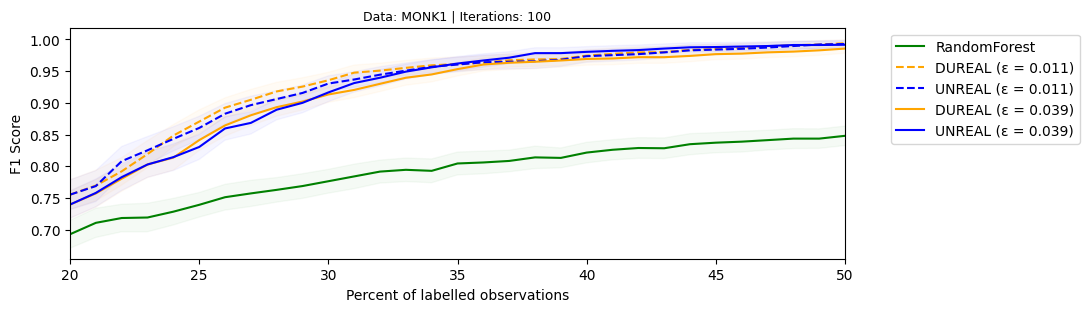

In [6]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {
    "RandomForest": "green",
    "DUREAL011": "orange",
    "UNREAL011": "blue",
    "DUREAL039": "orange",
    "UNREAL039": "blue"
}

linestyles = {
    "RandomForest": "solid",
    "DUREAL011": "dashed",
    "UNREAL011": "dashed",
    "DUREAL039": "solid",
    "UNREAL039": "solid"
}

LegendMapping = {
    "DUREAL011": "DUREAL (ε = 0.011)",
    "UNREAL011": "UNREAL (ε = 0.011)",
    "DUREAL039": "DUREAL (ε = 0.039)",
    "UNREAL039": "UNREAL (ε = 0.039)"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL011 = AnalyzedData011["Error_DUREAL"],
                 UNREAL011 = AnalyzedData011["Error_UNREAL"],
                #  DUREAL013 = AnalyzedData013["Error_DUREAL"],
                #  UNREAL013 = AnalyzedData013["Error_UNREAL"],
                #  DUREAL015 = AnalyzedData015["Error_DUREAL"],
                #  UNREAL015 = AnalyzedData015["Error_UNREAL"],
                #  DUREAL017 = AnalyzedData017["Error_DUREAL"],
                #  UNREAL017 = AnalyzedData017["Error_UNREAL"],
                #  DUREAL019 = AnalyzedData019["Error_DUREAL"],
                #  UNREAL019 = AnalyzedData019["Error_UNREAL"],
                #  DUREAL021 = AnalyzedData021["Error_DUREAL"],
                #  UNREAL021 = AnalyzedData021["Error_UNREAL"],
                #  DUREAL023 = AnalyzedData023["Error_DUREAL"],
                #  UNREAL023 = AnalyzedData023["Error_UNREAL"],
                #  DUREAL025 = AnalyzedData025["Error_DUREAL"],
                #  UNREAL025 = AnalyzedData025["Error_UNREAL"],
                #  DUREAL029 = AnalyzedData029["Error_DUREAL"],
                #  UNREAL029 = AnalyzedData029["Error_UNREAL"],
                #  DUREAL031 = AnalyzedData031["Error_DUREAL"],
                #  UNREAL031 = AnalyzedData031["Error_UNREAL"],
                #  DUREAL033 = AnalyzedData033["Error_DUREAL"],
                #  UNREAL033 = AnalyzedData033["Error_UNREAL"],
                #  DUREAL035 = AnalyzedData033["Error_DUREAL"],
                #  UNREAL035 = AnalyzedData035["Error_UNREAL"],
                #  DUREAL037 = AnalyzedData037["Error_DUREAL"],
                #  UNREAL037 = AnalyzedData037["Error_UNREAL"],
                 DUREAL039 = AnalyzedData039["Error_DUREAL"],
                 UNREAL039 = AnalyzedData039["Error_UNREAL"],
                LegendMapping=LegendMapping,
                 Colors = colors,
                 Linestyles=linestyles,
                xlim = [20,50],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.04,
                 VarInput = False,
                 CriticalValue = 1.96)

# Input

In [6]:
AnalyzedDataSmall = AnalyzedData011
AnalyzedDataLarge = AnalyzedData039

# Selection History

In [7]:
SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
SelectionHistoryRank_UNREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_UNREAL"], DataType = DataType)
SelectionHistoryRank_DUREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_DUREAL"], DataType = DataType)
SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
SelectionHistoryRank_UNREALLarge.sort_values(by = "AverageRank").head()
SelectionHistoryRank_DUREALLarge.sort_values(by = "AverageRank").head()

,AverageRank,Y,a1_1,a1_2,a2_1,a2_2,a3_1,a4_1,a4_2,a5_1,a5_2,a5_3,a6_1
85,11.343750,False,False,True,False,False,False,False,True,False,True,False,True
95,11.444444,False,False,False,True,False,False,False,True,False,False,True,False
74,12.753425,True,False,True,False,True,False,False,True,False,True,False,True
100,13.936508,False,False,False,False,True,True,False,True,False,False,False,False
82,14.250000,False,False,True,False,False,False,True,False,False,False,True,False


# Tree Counts

In [8]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioSmall = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioSmall, 
                              DUREAL_Average_TreeCountsRatioSmall,
                              np.round(UNREAL_Average_TreeCountsRatioSmall - DUREAL_Average_TreeCountsRatioSmall,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

UNREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioLarge = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioLarge, 
                              DUREAL_Average_TreeCountsRatioLarge,
                              np.round(UNREAL_Average_TreeCountsRatioLarge - DUREAL_Average_TreeCountsRatioLarge,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

## Number of All Trees

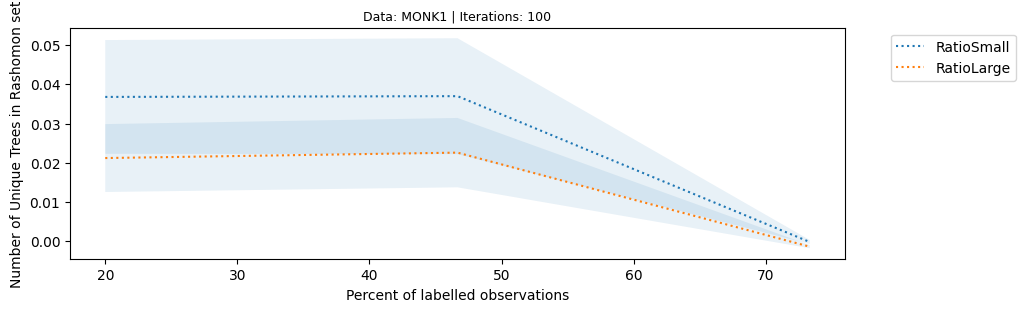

In [9]:
TreePlot = MeanVariancePlot(RelativeError = None,
                #  Unique_Small = AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"],
                #  ALL_Small = AnalyzedDataSmall["TreeCounts_ALL_UNREAL"],
                #  Unique_Large = AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"],
                #  ALL_Large = AnalyzedDataLarge["TreeCounts_ALL_UNREAL"],
                 RatioSmall = AverageTreeCountRatioSmall,
                 RatioLarge = AverageTreeCountRatioLarge,
                #  Colors = colors,
                #  Linestyles=linestyles,
                # xlim = [20,100],
                Y_Label = "Number of Unique Trees in Rashomon set",
                VarInput = False,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.1,
                 CriticalValue = 1.96)